In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data="Cropped"


In [ ]:
def processing_image(data):
    Y= []
    X= []
    for breed,num in enumerate(os.listdir(data)):
        images = os.listdir(os.path.join(data,num))
        for image in images:
            if image.endswith(".jpg"):
                gray_image = cv2.imread(os.path.join(data,num, image), cv2.IMREAD_GRAYSCALE)
                hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
                scale_hist=StandardScaler().fit_transform(hist)
                X.append(scale_hist.flatten())
                Y.append(breed)
    return np.array(X),np.array(Y)

In [ ]:
X,Y=processing_image(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=36,stratify=Y)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
kf = KFold(n_splits=5, shuffle=True, random_state=36)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=36)
data = []
def Knearclassifier(k,x,y,cv_type):
    terr,verr=[],[]
    if cv_type == 'KFold':
        cv = kf
    elif cv_type == 'StratifiedKFold':
        cv = skf
    for train_index, val_index in cv.split(x,y):
        x_train, x_val = x[train_index], x[val_index]
        y_train, y_val = y[train_index], y[val_index]
        clf=KNeighborsClassifier(n_neighbors=k)
        clf.fit(x_train, y_train)
        tp= clf.predict(x_train)
        vp = clf.predict(x_val)
        terr.append(1-accuracy_score(tp,y_train))
        verr.append(1-accuracy_score(vp,y_val))

    d = {'Train Error': np.mean(terr),'Validation Error':np.mean(verr),'K': k,'Fold Type':cv_type}
    data.append(d)
    df=pd.DataFrame(data)
    return df


In [ ]:
Knearclassifier(1,X_train,y_train,'KFold')
Knearclassifier(3,X_train,y_train,'KFold')
Knearclassifier(5,X_train,y_train,'KFold')
Knearclassifier(7,X_train,y_train,'KFold')
Knearclassifier(10,X_train,y_train,'KFold')
Knearclassifier(20,X_train,y_train,'KFold')
Knearclassifier(1,X_train,y_train,'StratifiedKFold')
Knearclassifier(3,X_train,y_train,'StratifiedKFold')
Knearclassifier(5,X_train,y_train,'StratifiedKFold')
Knearclassifier(7,X_train,y_train,'StratifiedKFold')
Knearclassifier(10,X_train,y_train,'StratifiedKFold')
df=Knearclassifier(20,X_train,y_train,'StratifiedKFold')

In [ ]:
fd=df
kf_data = fd[fd['Fold Type'] == 'KFold']
skf_data = fd[fd['Fold Type'] == 'StratifiedKFold']


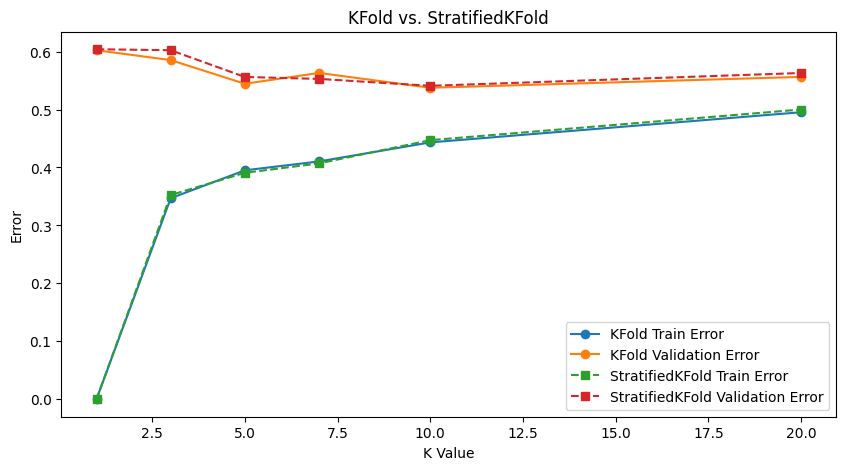

In [ ]:
##https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

plt.figure(figsize=(10, 5))
plt.plot(kf_data['K'], kf_data['Train Error'], label='KFold Train Error', marker='o', linestyle='-')
plt.plot(kf_data['K'], kf_data['Validation Error'], label='KFold Validation Error', marker='o', linestyle='-')
plt.plot(skf_data['K'], skf_data['Train Error'], label='StratifiedKFold Train Error', marker='s', linestyle='--')
plt.plot(skf_data['K'], skf_data['Validation Error'], label='StratifiedKFold Validation Error', marker='s', linestyle='--')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.title('KFold vs. StratifiedKFold')
plt.legend()
plt.show()


In [ ]:
df

,Train Error,Validation Error,K,Fold Type
0,0.000000,0.602332,1,KFold
1,0.346841,0.585311,3,KFold
2,0.395053,0.544415,5,KFold
3,0.410406,0.563117,7,KFold
4,0.443250,0.537520,10,KFold
5,0.495308,0.556294,20,KFold
6,0.000000,0.604056,1,StratifiedKFold
7,0.352386,0.602318,3,StratifiedKFold
8,0.390771,0.556222,5,StratifiedKFold
9,0.406990,0.552832,7,StratifiedKFold


* Train error is less when k -**1** for KFold and StratifiedKFold
* Validation error is less when k=**10** for KFold when k=**10** for StratifiedKFold
* High complexity and overfits at k=**1** , low complexity and underfits at k= **20**

In [ ]:

Model=KNeighborsClassifier(n_neighbors=10)
Model.fit(X_train,y_train)
print("Test error when k is 10 ")
print(1-accuracy_score(Model.predict(X_test),y_test))

Test error when k is 10 
0.5170068027210885


In [ ]:
##https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator

Decision_Tree


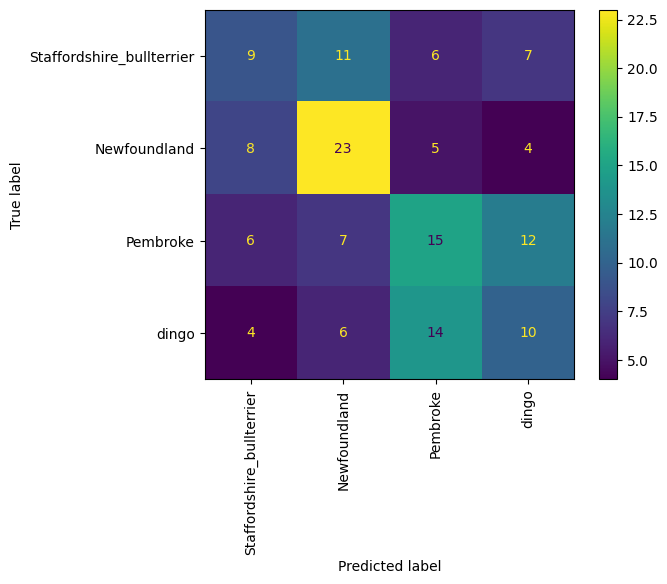

C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached a

Neural_Network


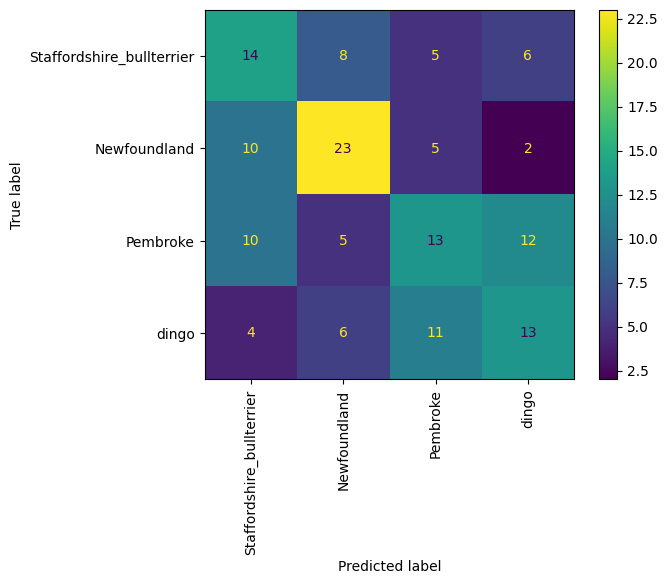

Random_Forest


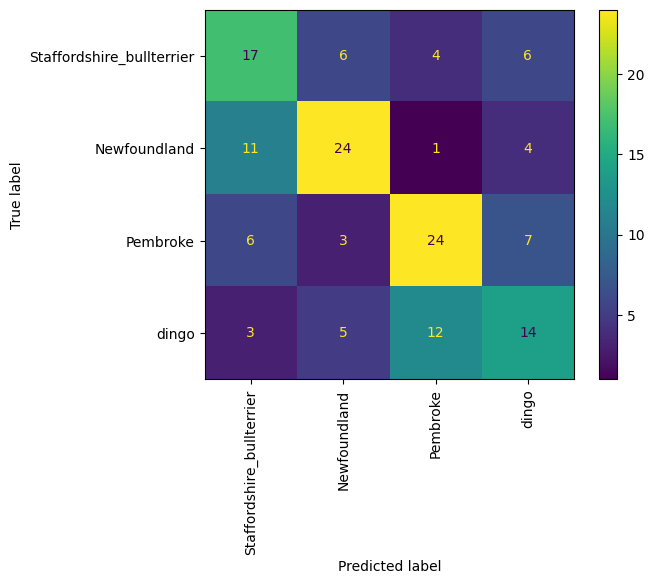

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,f1_score

clf = { "Decision_Tree": DecisionTreeClassifier(max_depth=10), "Neural_Network": MLPClassifier(hidden_layer_sizes=(10, 10, 10)), "Random_Forest": RandomForestClassifier()}

Mean_validation_accuracy,test_accuracy,f1_scores=[],[],[]
for name, clf in clf.items():
    Mean_validation_accuracy.append(cross_val_score(clf,X_train,y_train,cv=skf).mean())
    clf.fit(X_train,y_train)
    test_accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    f1_scores.append(f1_score(clf.predict(X_test),y_test,average='weighted'))
    print(f'{name}')
    ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,xticks_rotation='vertical',display_labels=['Staffordshire_bullterrier','Newfoundland','Pembroke','dingo'])
    plt.show()

* Based on confusion matrices Random Forest best classifies than other two methods

In [ ]:
f1_scores

[0.3932062651789142, 0.4306041305980512, 0.5374570503822205]

* Based on F1 scores RandomForest hast the heighest

In [ ]:
Mean_validation_accuracy

[0.37550340431696366, 0.41295089091699266, 0.46421845574387943]

 * Based on mean validation accuracy RandomForest is high

In [ ]:
test_accuracy

[0.3877551020408163, 0.42857142857142855, 0.5374149659863946]

* Based on test accuracy RandomForest is highest